## Clonando a base de dados

In [243]:
!git clone https://github.com/Bootcamp-Atlantico-Machine-Learning/database.git

fatal: destination path 'database' already exists and is not an empty directory.


## Importando as bibliotecas necessárias

In [244]:
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import cv2
import numpy as np

## Coletando o caminho para as fotos

In [245]:
masks = sorted(glob(f"/content/database/Dataset_BUSI_with_GT/*/*_mask.png"))
images = sorted(glob(f"/content/database/Dataset_BUSI_with_GT/*/*).png"))

## Criando o dataframe contendo:
- Name      
- Category  
- Original  
- Marsk     
- dtype: int64


In [246]:
#criando o dataframe
df = pd.DataFrame(
  [{'Name': str(image.split('/')[5])[:-4], 'Category': image.split('/')[4], 'Original': image, 'Marsk': mask } for image, mask in zip(images, masks)]
)

df.head()

,Name,Category,Original,Marsk
0,benign (1),benign,/content/database/Dataset_BUSI_with_GT/benign/...,/content/database/Dataset_BUSI_with_GT/benign/...
1,benign (10),benign,/content/database/Dataset_BUSI_with_GT/benign/...,/content/database/Dataset_BUSI_with_GT/benign/...
2,benign (100),benign,/content/database/Dataset_BUSI_with_GT/benign/...,/content/database/Dataset_BUSI_with_GT/benign/...
3,benign (101),benign,/content/database/Dataset_BUSI_with_GT/benign/...,/content/database/Dataset_BUSI_with_GT/benign/...
4,benign (102),benign,/content/database/Dataset_BUSI_with_GT/benign/...,/content/database/Dataset_BUSI_with_GT/benign/...


## Criando um novo dataframe por categorias

### Benign

In [247]:
df_benign = df.query('Category == "benign"')

height = list()
width = list()

for img_benign in df_benign['Original']:
  img = plt.imread(img_benign)
  _height, _width, channel = img.shape
  height.append(_height)
  width.append(_width)

df_benign.loc[:, 'height'] = height
df_benign.loc[:, 'width'] = width

del height
del width

df_benign.head()

<ipython-input-247-5f64e6ebfb0e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_benign.loc[:, 'height'] = height
<ipython-input-247-5f64e6ebfb0e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_benign.loc[:, 'width'] = width


,Name,Category,Original,Marsk,height,width
0,benign (1),benign,/content/database/Dataset_BUSI_with_GT/benign/...,/content/database/Dataset_BUSI_with_GT/benign/...,471,562
1,benign (10),benign,/content/database/Dataset_BUSI_with_GT/benign/...,/content/database/Dataset_BUSI_with_GT/benign/...,585,683
2,benign (100),benign,/content/database/Dataset_BUSI_with_GT/benign/...,/content/database/Dataset_BUSI_with_GT/benign/...,473,323
3,benign (101),benign,/content/database/Dataset_BUSI_with_GT/benign/...,/content/database/Dataset_BUSI_with_GT/benign/...,473,563
4,benign (102),benign,/content/database/Dataset_BUSI_with_GT/benign/...,/content/database/Dataset_BUSI_with_GT/benign/...,610,634


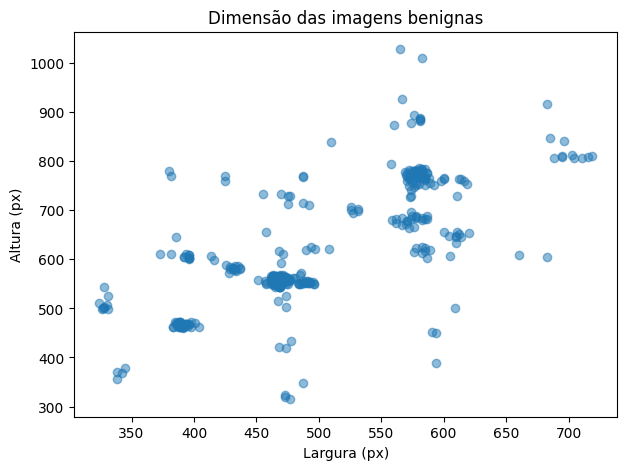

In [248]:
plt.figure(figsize=(7,5))
plt.scatter(df_benign.height, df_benign.width, alpha=0.5)

plt.title('Dimensão das imagens benignas')
plt.xlabel('Largura (px)')
plt.ylabel('Altura (px)')
plt.show()

In [249]:
df_benign_height_min = df_benign['height'].min()
df_benign_width_min = df_benign['width'].min()
df_benign_height_std = df_benign['height'].mean()
df_benign_width_std = df_benign['width'].mean()
df_benign_qtr_rows = df_benign.shape[0]

print(f"min height value: {df_benign_height_min}")
print(f"min wigth value: {df_benign_width_min}")
print(f"average height value: {df_benign_height_std}")
print(f"average width value: {df_benign_width_std}")
print(f"qtd row: {df_benign_qtr_rows}")

min height value: 324
min wigth value: 315
average height value: 495.47139588100686
average width value: 613.3867276887872
qtd row: 437


### Normal

In [250]:
df_normal = df.query('Category == "normal"')

height = list()
width = list()

for img_normal in df_normal['Original']:
  img = plt.imread(img_normal)
  _height, _width, channel = img.shape
  height.append(_height)
  width.append(_width)

df_normal.loc[:, 'height'] = height
df_normal.loc[:, 'width'] = width

del height
del width

df_normal.head()

<ipython-input-250-ced2a7272506>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normal.loc[:, 'height'] = height
<ipython-input-250-ced2a7272506>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normal.loc[:, 'width'] = width


,Name,Category,Original,Marsk,height,width
647,normal (1),normal,/content/database/Dataset_BUSI_with_GT/normal/...,/content/database/Dataset_BUSI_with_GT/normal/...,470,568
648,normal (10),normal,/content/database/Dataset_BUSI_with_GT/normal/...,/content/database/Dataset_BUSI_with_GT/normal/...,485,501
649,normal (100),normal,/content/database/Dataset_BUSI_with_GT/normal/...,/content/database/Dataset_BUSI_with_GT/normal/...,574,690
650,normal (101),normal,/content/database/Dataset_BUSI_with_GT/normal/...,/content/database/Dataset_BUSI_with_GT/normal/...,572,678
651,normal (102),normal,/content/database/Dataset_BUSI_with_GT/normal/...,/content/database/Dataset_BUSI_with_GT/normal/...,576,770


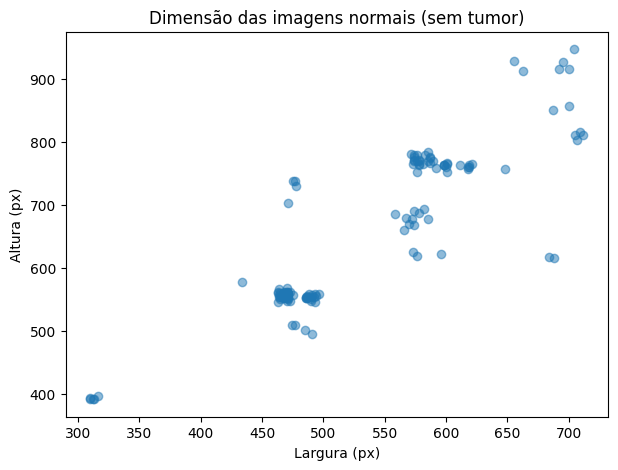

In [251]:
plt.figure(figsize=(7,5))
plt.scatter(df_normal.height, df_normal.width, alpha=0.5)

plt.title('Dimensão das imagens normais (sem tumor)')
plt.xlabel('Largura (px)')
plt.ylabel('Altura (px)')
plt.show()

In [252]:
df_normal_height_min = df_normal['height'].min()
df_normal_width_min = df_normal['width'].min()
df_normal_height_std = df_normal['height'].mean()
df_normal_width_std = df_normal['width'].mean()
df_normal_qtr_rows = df_normal.shape[0]

print(f"min height value: {df_normal_height_min}")
print(f"min wigth value: {df_normal_width_min}")
print(f"average height value: {df_normal_height_std}")
print(f"average width value: {df_normal_width_std}")
print(f"qtd row: {df_normal_qtr_rows}")

min height value: 310
min wigth value: 391
average height value: 532.8496240601504
average width value: 651.172932330827
qtd row: 133


### Malignant

In [253]:
df_malignant = df.query('Category == "malignant"')

height = list()
width = list()

for img_malignant in df_malignant['Original']:
  img = plt.imread(img_malignant)
  _height, _width, channel = img.shape
  height.append(_height)
  width.append(_width)

df_malignant.loc[:, 'height'] = height
df_malignant.loc[:, 'width'] = width

del height
del width

df_malignant.head()

<ipython-input-253-f16db3864cd1>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_malignant.loc[:, 'height'] = height
<ipython-input-253-f16db3864cd1>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_malignant.loc[:, 'width'] = width


,Name,Category,Original,Marsk,height,width
437,malignant (1),malignant,/content/database/Dataset_BUSI_with_GT/maligna...,/content/database/Dataset_BUSI_with_GT/maligna...,598,449
438,malignant (10),malignant,/content/database/Dataset_BUSI_with_GT/maligna...,/content/database/Dataset_BUSI_with_GT/maligna...,393,462
439,malignant (100),malignant,/content/database/Dataset_BUSI_with_GT/maligna...,/content/database/Dataset_BUSI_with_GT/maligna...,476,557
440,malignant (101),malignant,/content/database/Dataset_BUSI_with_GT/maligna...,/content/database/Dataset_BUSI_with_GT/maligna...,559,883
441,malignant (102),malignant,/content/database/Dataset_BUSI_with_GT/maligna...,/content/database/Dataset_BUSI_with_GT/maligna...,551,916


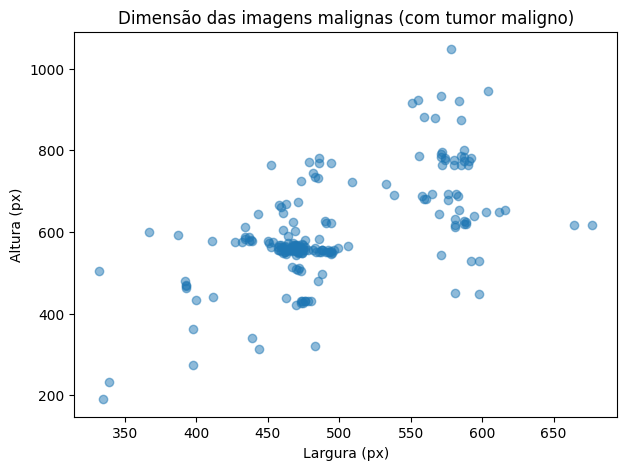

In [254]:
plt.figure(figsize=(7,5))
plt.scatter(df_malignant.height, df_malignant.width, alpha=0.5)

plt.title('Dimensão das imagens malignas (com tumor maligno)')
plt.xlabel('Largura (px)')
plt.ylabel('Altura (px)')
plt.show()

In [255]:
df_malignant_height_min = df_malignant['height'].min()
df_malignant_width_min = df_malignant['width'].min()
df_malignant_height_std = df_malignant['height'].mean()
df_malignant_width_std = df_malignant['width'].mean()
df_malignant_qtr_rows = df_malignant.shape[0]

print(f"min height value: {df_malignant_height_min}")
print(f"min wigth value: {df_malignant_width_min}")
print(f"average height value: {df_malignant_height_std}")
print(f"average width value: {df_malignant_width_std}")

print(f"qtd row: {df_malignant_qtr_rows}")

min height value: 332
min wigth value: 190
average height value: 494.01428571428573
average width value: 597.9714285714285
qtd row: 210


## Criando função que exibe as propriedades de uma imagem

In [256]:
def img_all_info(img, color_channel_img_view=False) -> None:
  """ Verify img info

  Args:
      numpy.ndarray: img

  Returns:
      None
  """
  if img is not None:
    height, width, channels = img.shape # Resgatando as dimensões da imagem

    for i in range(3):
      # Resgatando informações sobre os primeiros pixels
      pixel = img[i, i]
      print(f'Pixel {i + 1}: Valor BGR: {pixel}')

    properties = [
        ('height', img.shape[0]),
        ('width', img.shape[1]),
        ('color channels', img.shape[2]),
        ('data type', img.dtype),
        ('Max value', img.max()),
        ('Min value', img.min()),
        ('Average', img.mean()),
        ('Sandard deviation', img.std())
    ]

    for prop_name, prop_value in properties:
      print(f'{prop_name}: {prop_value}')


    if color_channel_img_view:
      # Divindo as imagens em canais de cores
      b, g, r = cv2.split(img)

      plt.figure(figsize=(10, 5))
      plt.subplot(131)
      plt.imshow(r, cmap='gray')
      plt.title('R channel')

      plt.subplot(132)
      plt.imshow(g, cmap='gray')
      plt.title('G channel')

      plt.subplot(133)
      plt.imshow(b, cmap='gray')
      plt.title('B channel')

img_all_info(img, color_channel_img_view=False)


Pixel 1: Valor BGR: [0.5803922 0.5803922 0.5803922]
Pixel 2: Valor BGR: [0.7529412 0.7529412 0.7529412]
Pixel 3: Valor BGR: [0.03137255 0.03137255 0.03137255]
height: 486
width: 550
color channels: 3
data type: float32
Max value: 1.0
Min value: 0.0
Average: 0.3882613182067871
Sandard deviation: 0.2697182595729828


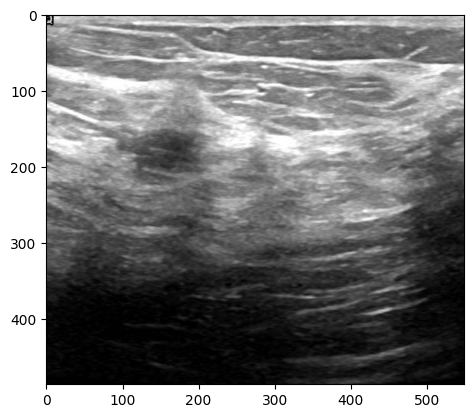

486 550


In [257]:
plt.imshow(img)
plt.show()
altura, largura, channel = img.shape
print(altura, largura)

## Realizando o redimensionamento das imagens

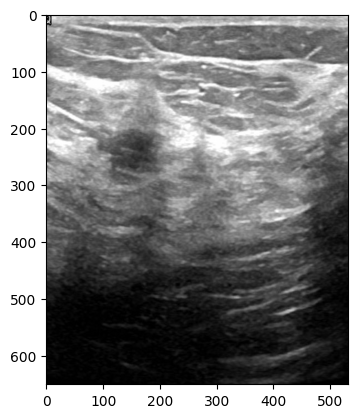

In [258]:
def resize_img(img, heigth, width):
  return cv2.resize(img, (heigth, width),
               interpolation = cv2.INTER_CUBIC)

stretch_near = resize_img(img, int(df_normal_height_std), int(df_normal_width_std))
plt.imshow(stretch_near)
plt.show()

## Modificando as propriedades das imagens

### Lendo a imagem

In [259]:
#exibindo foto e aplicando limiar com a imagem cinza
img = cv2.imread(df['Original'][0], 0)
# plt.imshow(img)
# plt.axis('off')
# plt.show()
# gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY )

### Suavização da imagem

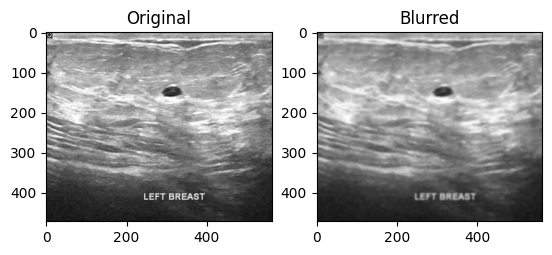

In [260]:
# blurred_gray = cv2.blur(gray, (5, 5))
blurred_img = cv2.GaussianBlur(img, (11, 11), 0)


plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title('Blurred')
plt.imshow(cv2.cvtColor(blurred_img, cv2.COLOR_BGR2RGB ))

plt.show()

### Aplicando o limiar na imagem

True


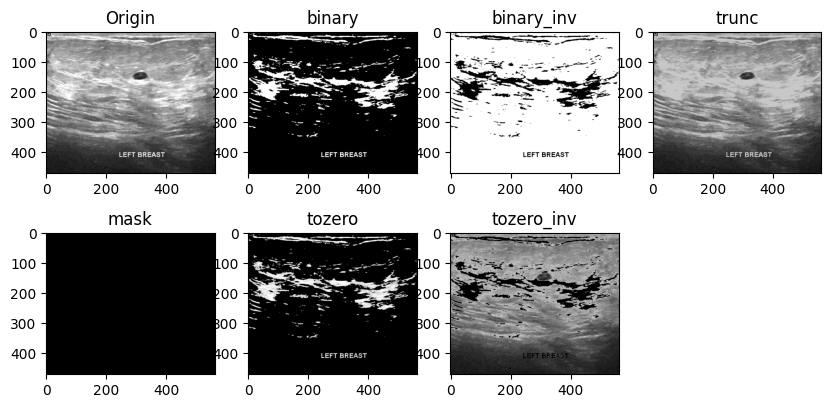

True


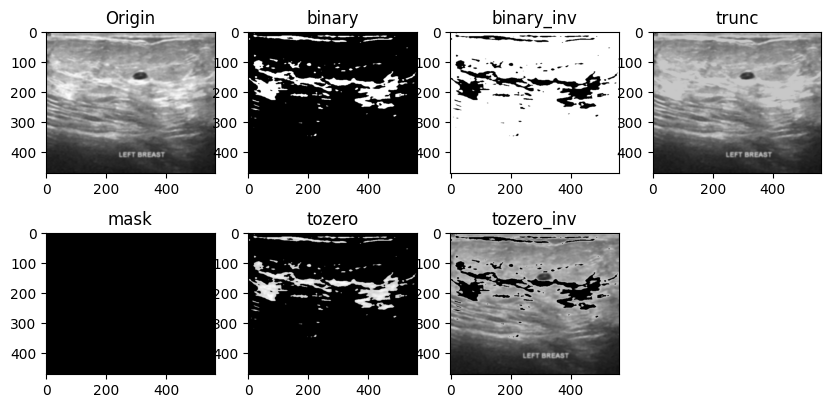

In [261]:
def limiar_img(img, limiar=130):
  _, thresh1 = cv2.threshold(img, limiar, 255, cv2.THRESH_BINARY)
  _, thresh2 = cv2.threshold(img, limiar, 255, cv2.THRESH_BINARY_INV)
  _, thresh3 = cv2.threshold(img, limiar, 255, cv2.THRESH_TRUNC)
  _, thresh4 = cv2.threshold(img, limiar, 255, cv2.THRESH_MASK)
 # _, thresh5 = cv2.threshold(img, limiar, 255, cv2.THRESH_OTSU)
  _, thresh6 = cv2.threshold(img, limiar, 255, cv2.THRESH_TOZERO)
  _, thresh7 = cv2.threshold(img, limiar, 255, cv2.THRESH_TOZERO_INV)

  titles = [
      'Origin',
      'binary',
      'binary_inv',
      'trunc',
      'mask',
      #'otsu',
      'tozero',
      'tozero_inv'
]

  threshs = [
      img,
      thresh1,
      thresh2,
      thresh3,
      thresh4,
      # thresh5,
      thresh6,
      thresh7
]

  plt.figure(figsize=(10, 10))
  print(len(titles) == len(threshs))
  for i in range(len(titles)):
    plt.subplot(4, 4, i + 1)
    plt.imshow(cv2.cvtColor(threshs[i], cv2.COLOR_BGR2RGB), cmap = 'gray')
    plt.title(titles[i])

  plt.show()

limiar = 200

limiar_img(img, limiar)
limiar_img(blurred_img, limiar)


### Realce da imagem

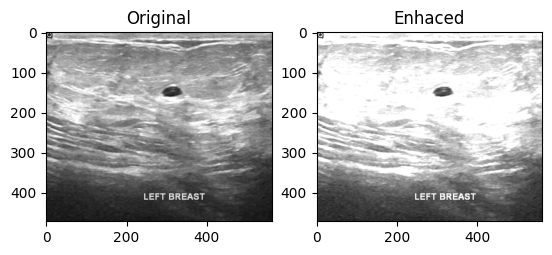

In [262]:
enhaced_image = cv2.convertScaleAbs(img, alpha=1.5, beta=5)

plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title('Enhaced')
plt.imshow(cv2.cvtColor(enhaced_image, cv2.COLOR_BGR2RGB ))

plt.show()

True


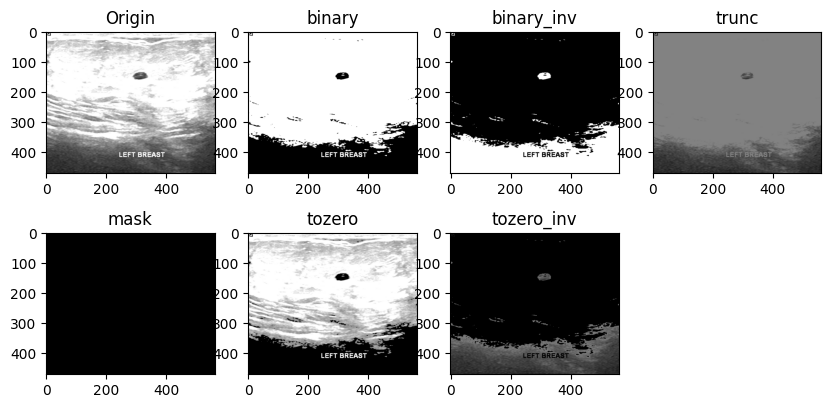

In [263]:
limiar_img(enhaced_image)

### Equalizando a imagem

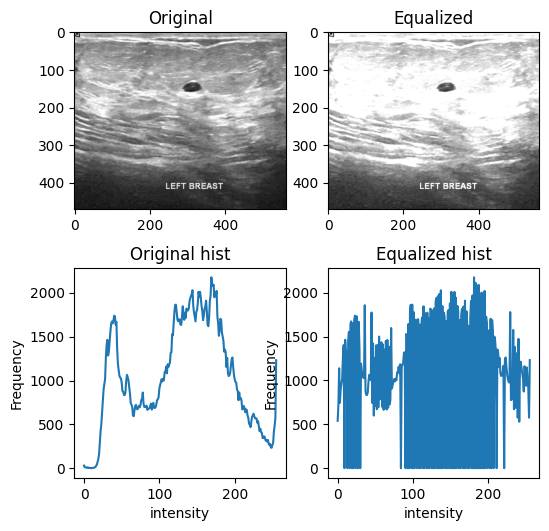

True


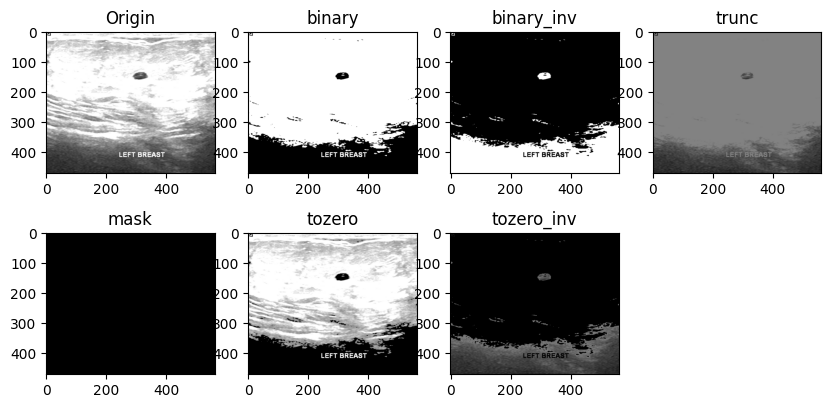

In [264]:
equalized_image = cv2.equalizeHist(img)

hist_original = cv2.calcHist([img], [0], None, [256], [0, 256])
hist_equalized= cv2.calcHist([equalized_image], [0], None, [256], [0, 256])

plt.figure(figsize=(6, 6))

plt.subplot(2, 2, 1)
plt.title('Original')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.subplot(2, 2, 2)
plt.title('Equalized')
plt.imshow(cv2.cvtColor(enhaced_image, cv2.COLOR_BGR2RGB ))

plt.subplot(2, 2, 3)
plt.plot(hist_original)
plt.title('Original hist')
plt.xlabel('intensity')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.plot(hist_equalized)
plt.title('Equalized hist')
plt.xlabel('intensity')
plt.ylabel('Frequency')

plt.show()

limiar_img(enhaced_image)

### Identificando as bordas

#### Método **sobel**

In [265]:
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

In [266]:
gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

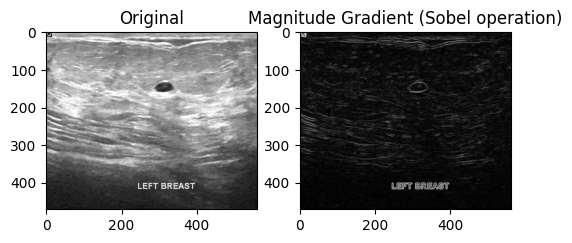

In [267]:
plt.figure(figsize=(6, 6))

plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(img, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Magnitude Gradient (Sobel operation)')
plt.imshow(gradient_magnitude, cmap='gray')


#### Método *Canny*

In [268]:
canny_img = cv2.Canny(img, threshold1=100, threshold2=200)

True


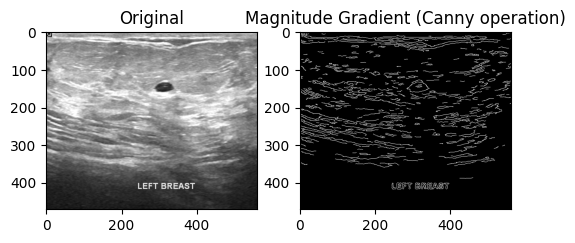

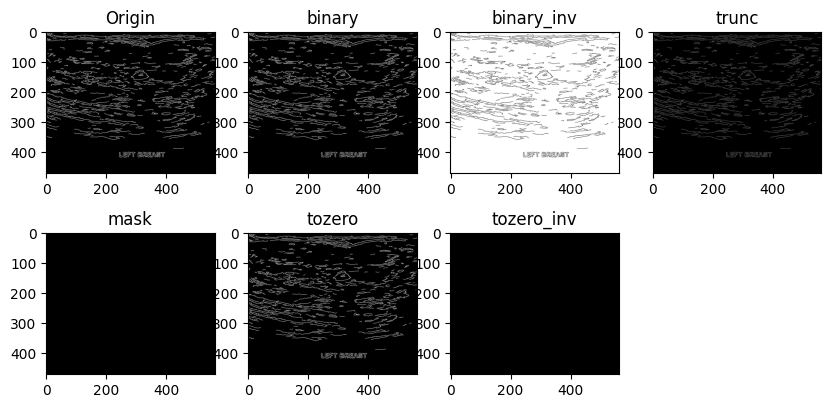

In [269]:
plt.figure(figsize=(6, 6))

plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(img, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Magnitude Gradient (Canny operation)')
plt.imshow(canny_img, cmap='gray')

limiar_img(canny_img)

### Realce adaptativo de contraste

In [270]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_img = clahe.apply(img)

True


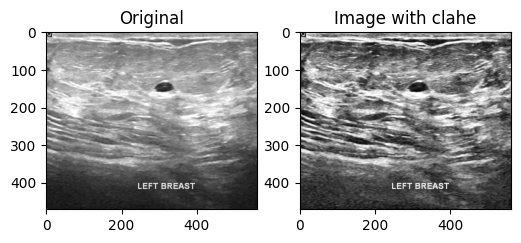

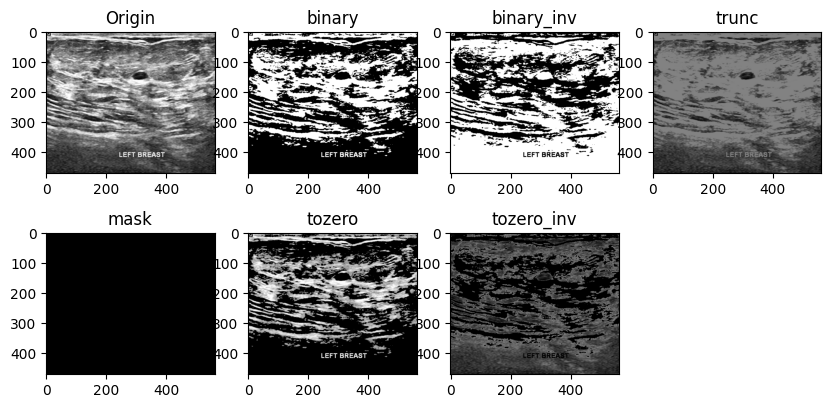

In [271]:
plt.figure(figsize=(6, 6))

plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(img, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Image with clahe')
plt.imshow(clahe_img, cmap='gray')

limiar_img(clahe_img)

### Redução de ruído

In [272]:
median_filtered_img = cv2.medianBlur(img, 5)

True


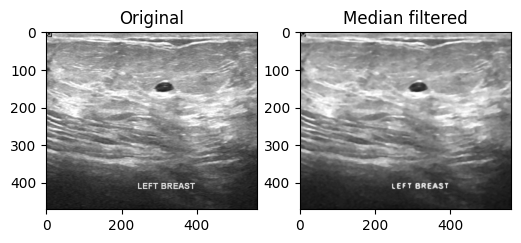

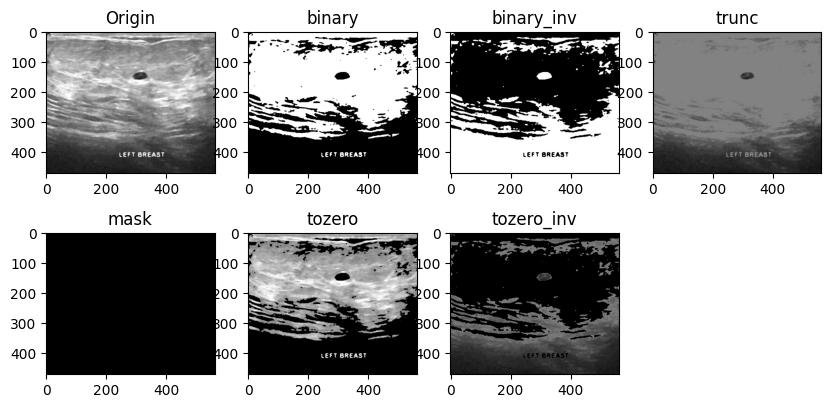

In [273]:
plt.figure(figsize=(6, 6))

plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(img, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Median filtered')
plt.imshow(median_filtered_img, cmap='gray')

limiar_img(median_filtered_img)